<a href="https://colab.research.google.com/github/w1767/MSc-project/blob/main/NBeats_Forecasting_VVIX_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#transformers for time series data
# n-beats: neural basis expansion analysis for interpretable time series forecasting
# detrend data
#remove seasonality
#turn into supervised learning process
#get baseline, important for ML problems start with simple naive baseline = predict the last time step as the next step
#being able to quantify our confidence in forecasting referred to as uncertainty, confidence interval, prediction interval
#UBER uses Bayesian or MC dropout
# one way to do this is Monte Carlo dropout is to use dropout at inference and run multiple simulations
#two types of uncertainty
#1. coconut uncertainty - get hit on a beach by coconut = epistemic uncertainty/hard to estimate
#2. subway uncertainty - train should appear at 5pm but it shows up 1-2 min either side= aleatory uncertainty
#aleatory uncertainty = data uncertainty
#weather = predict every day 
#nate silver vs Nasim Taleb
# politic outcomes = open system, many different variables
#silver says that last outcome is all that matters
#taleb says tail risk
#WRMSSE = WEIGHT ROOT MEAN SQUARE ERROR
#kaggle 101 = GOT A TABULAR DATA? THEN STACK TOGETHER ENSEMBLES OF LIGHTGBM/XGBOOST
#replicate and modify https://arxiv.org/pdf/1905.10437.pdf 

In [2]:
!wget https://github.com/ElementAI/N-BEATS

--2022-04-21 11:15:42--  https://github.com/ElementAI/N-BEATS
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘N-BEATS’

N-BEATS                 [ <=>                ] 179.93K  --.-KB/s    in 0.04s   

2022-04-21 11:15:42 (4.52 MB/s) - ‘N-BEATS’ saved [184251]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/PhD research/VVIX AND VIX DATA.xlsx"

In [5]:
#check for gpu
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
#import pandas
import pandas as pd
#because data has date component, pandas will parse the dates using the parse_dates parameters
df=pd.read_csv("/content/drive/MyDrive/PhD research/VIX daily.csv",
                  parse_dates=["Date"],
                  index_col=["Date"]) # parse the date column and tell pandas that column 1 is a datetime
df.head()

,Last Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
Date,,,,,,,
2022-04-20,21.19,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-19,21.37,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-18,22.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-14,22.70,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-13,21.82,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df

,Last Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
Date,,,,,,,
2022-04-20,21.19,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-19,21.37,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-18,22.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-14,22.70,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-13,21.82,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().any()

Last Price    True
Unnamed: 2    True
Unnamed: 3    True
Unnamed: 4    True
Unnamed: 5    True
Unnamed: 6    True
Unnamed: 7    True
dtype: bool

In [9]:
to_plt=df.sort_values(by = 'Date').set_index('Date')

KeyError: ignored

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12247 entries, 2022-04-20 to NaT
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Last Price  8136 non-null   float64
 1   Unnamed: 2  0 non-null      float64
 2   Unnamed: 3  0 non-null      float64
 3   Unnamed: 4  0 non-null      float64
 4   Unnamed: 5  0 non-null      float64
 5   Unnamed: 6  0 non-null      float64
 6   Unnamed: 7  0 non-null      float64
dtypes: float64(7)
memory usage: 765.4 KB


In [11]:
len(df)

12247

In [12]:
# only last price for each date
VIX_daily = pd.DataFrame(df["Last Price"]).rename(columns={"Last Price": "Price"})
VIX_daily.head()

,Price
Date,
2022-04-20,21.19
2022-04-19,21.37
2022-04-18,22.17
2022-04-14,22.70
2022-04-13,21.82


In [13]:
VIX_daily.isnull().any()

Price    True
dtype: bool

In [14]:
VIX_daily=VIX_daily.dropna()

In [ ]:
#Plot
import matplotlib.pyplot as plt
VIX_daily.plot(figsize=(10, 7))
plt.ylabel("VIX")
plt.title("VIX daily from 1990 to 2022", fontsize=16)
plt.legend(fontsize=10);

In [16]:
#turn DataFrame index and column into numpy arrays
timesteps = VIX_daily.index.to_numpy()
prices = VIX_daily["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2022-04-20T00:00:00.000000000', '2022-04-19T00:00:00.000000000',
        '2022-04-18T00:00:00.000000000', '2022-04-14T00:00:00.000000000',
        '2022-04-13T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-11-04T00:00:00.000000000', '2022-08-04T00:00:00.000000000',
        '2022-07-04T00:00:00.000000000', '2022-06-04T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([21.19, 21.37, 22.17, 22.7 , 21.82, 24.26, 24.37, 21.16, 21.55,
        22.1 ]))

In [17]:
import sklearn
from sklearn.model_selection import train_test_split 
X_train = []
y_train = []
X_test = []
y_test = []

#create train, test, validate sets
split_size = int(0.2 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[split_size:], prices[split_size:]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[:split_size], prices[:split_size]

len(X_train), len(X_test), len(y_train), len(y_test)


(6509, 1627, 6509, 1627)

In [18]:
X_test, y_test

(array(['2022-04-20T00:00:00.000000000', '2022-04-19T00:00:00.000000000',
        '2022-04-18T00:00:00.000000000', ...,
        '2015-05-11T00:00:00.000000000', '2015-04-11T00:00:00.000000000',
        '2015-03-11T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([21.19, 21.37, 22.17, ..., 15.05, 15.51, 14.54]))

In [19]:
X_train, y_train

(array(['2015-02-11T00:00:00.000000000', '2015-10-30T00:00:00.000000000',
        '2015-10-29T00:00:00.000000000', ...,
        '1990-04-01T00:00:00.000000000', '1990-03-01T00:00:00.000000000',
        '1990-02-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([14.15, 15.07, 14.61, ..., 19.22, 18.19, 17.24]))

In [20]:
#plot train_test_split
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("VIX")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

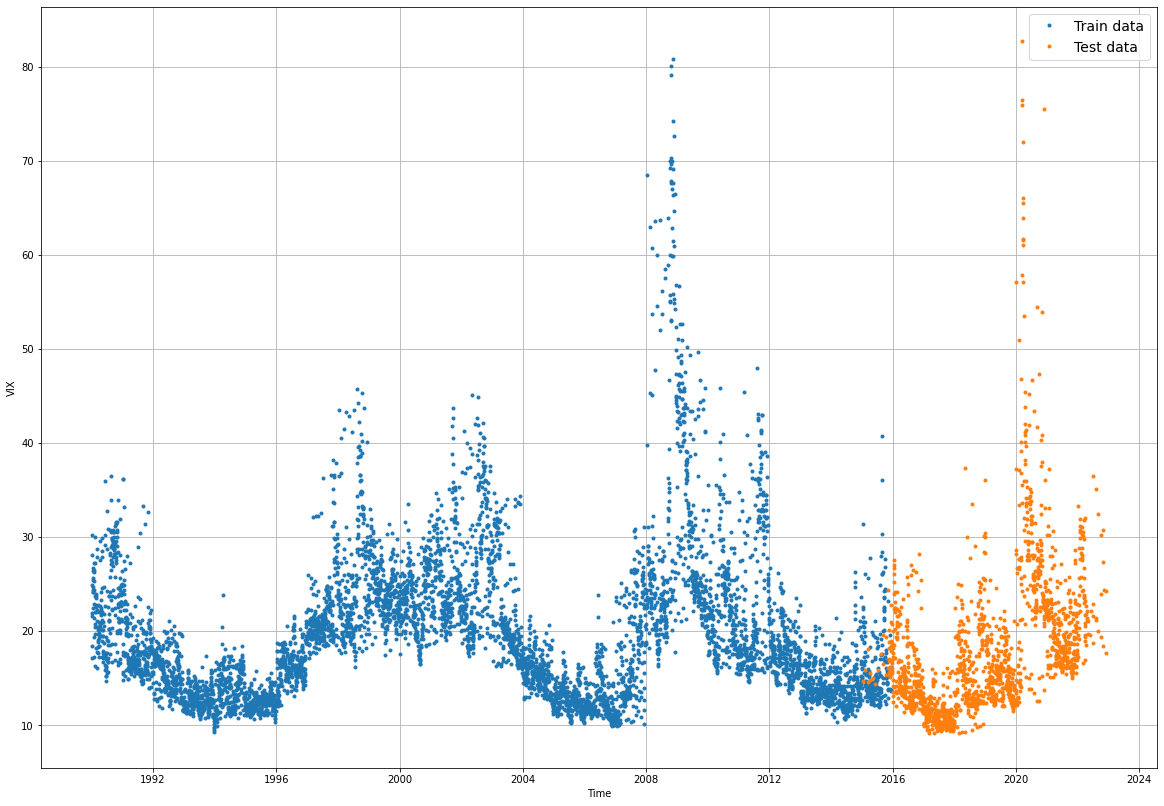

In [21]:
# plot train_test_split
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [22]:
#Forecasting Experiments
#horizon is the number of steps we are going to predict into the future
#window is the number of timesteps from past used to predict horizon
#for example to predict VIX for 1 day in the future use the previous 7 days in the past. 
# we will see how the models work without taking log differences and normalisation first. then we will
#do the log differences and normalise the date




In [23]:
# Model 1. Naive forecast (baseline)
#use previous time value to predict the next timestep value
# y(t+1) = y(t) -> in economic theory this is called martingale


In [24]:
# create a naive forecast
naive_forecast = y_test[:-1] # naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10] # first 10 and last 10

(array([21.19, 21.37, 22.17, 22.7 , 21.82, 24.26, 24.37, 21.16, 21.55,
        22.1 ]), 18.84)

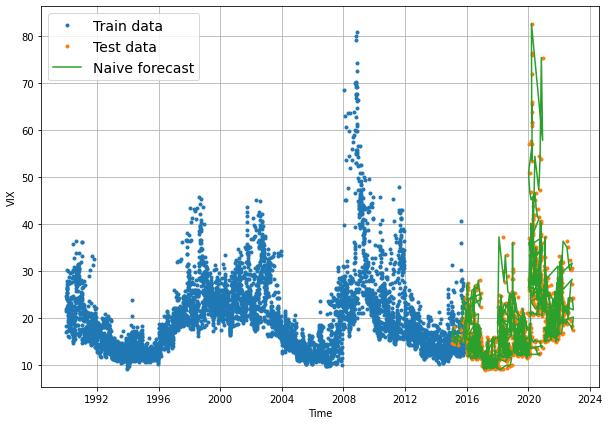

In [25]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

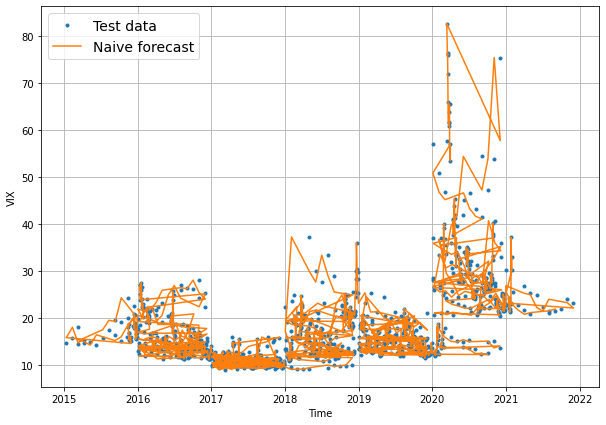

In [26]:
#ZOOM IN
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

#Evaluating forecasts
#how our model's predictions y_pred compare against the actual values y_true 

In [27]:
import tensorflow as tf

In [28]:
#calculate MASE
# https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season


In [29]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [31]:
#Baselines forecast 
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 1.1792436,
 'mape': 5.9647007,
 'mase': 0.99947894,
 'mse': 4.284379,
 'rmse': 2.069874}

In [33]:
#the naive forecast is on average 1.17 different from the actual data
#calculate average of Vix
# so the naive forecast is off by more than 10% on average
tf.reduce_mean(y_test).numpy()

18.280043023970496

In [34]:
#Windowing dataset
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon